In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from hand_made_neural_network.lib import handmade_nn
import numpy as np
import seaborn as sns

# Generate 2D binary data and plot

[(-1.0, 1.0), (-1.0, 1.0)]

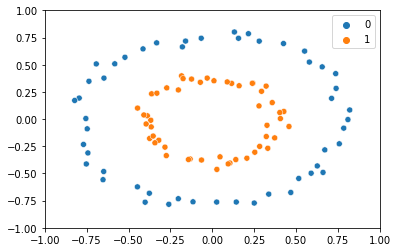

In [4]:
from sklearn.datasets import make_circles
X_circle, y_circle = make_circles(n_samples= 100, noise=0.05, factor=0.5,random_state=1)
X_circle *= 0.8
plot = sns.scatterplot(x= X_circle[:,0], y=X_circle[:,1],hue=y_circle)
plot.set(xlim=(-1,1), ylim=(-1,1))

## Generate grid for the heatmap

In [5]:
step = 0.01
n_steps=int(2/step)
grid = np.concatenate([np.array([(-1 +(i+.5)* step)*np.ones(n_steps),np.arange(-1+step/2,1,step)]).T for i in range(n_steps)],axis=0)

In [6]:
step = 0.01
n_steps=int(2/step)
columns=[]
for i in range(n_steps):
    columns.append(np.array([(-1 +(i+.5)* step)*np.ones(n_steps),np.arange(-1+step/2,1,step)]).T)
grid=np.concatenate(columns,axis=0)

# Benchmarking the optimizers

initial loss: 0.6868765409278588
final loss: 0.04524993873741374


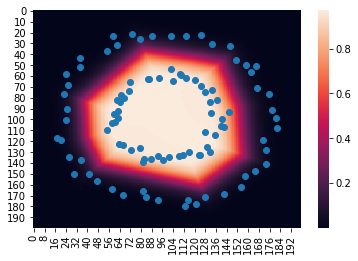

In [33]:
model = handmade_nn(input_dim=2)
model.add_dense_layer(4,'relu')
model.add_dense_layer(4,'relu')
model.add_dense_layer(1, 'sigmoid')
model.fit(X_circle,y_circle,loss='binary_crossentropy', optimizer= 'sgd', batch_size=16,n_epochs=1000)
graph=sns.heatmap(model.predict(grid).reshape((n_steps,n_steps)))
graph.scatter(x= (X_circle[:,0]+1)*100, y=(X_circle[:,1]+1)*100)

initial loss: 0.6982000343836507
final loss: 0.001601608549692142


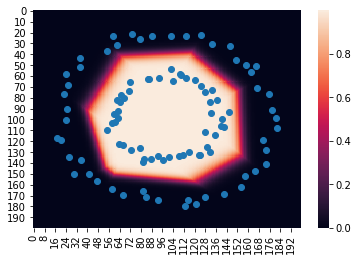

In [42]:
model = handmade_nn(input_dim=2)
model.add_dense_layer(4,'relu')
model.add_dense_layer(4,'relu')
model.add_dense_layer(1, 'sigmoid')
model.fit(X_circle,y_circle,loss='binary_crossentropy', optimizer='adam', batch_size=16,n_epochs=1000)
graph=sns.heatmap(model.predict(grid).reshape((n_steps,n_steps)))
graph.scatter(x= (X_circle[:,0]+1)*100, y=(X_circle[:,1]+1)*100)

# New test with the same network as in the tutorial

In [35]:
model = handmade_nn(input_dim=2)
model.add_dense_layer(4,'tanh')
model.add_dense_layer(3,'tanh')
model.add_dense_layer(1, 'sigmoid')

In [36]:
model.weights = [np.array([[5.15045094e-01, 7.71080942e-01],
         [2.40597558e-05, 1.27794266e-01],
         [8.51358255e-01, 2.40605413e-01],
         [1.81029934e-01, 7.25234350e-01]]),
  np.array([[0.31549234, 0.57829072, 0.04666635, 0.93386572],
         [0.60140935, 0.92364091, 0.24940746, 0.13005867],
         [0.59650737, 0.3965407 , 0.24233158, 0.32827774]]),
  np.array([[0.01200974, 0.36626125, 0.34816268]])]

In [37]:
y_pred_initial = model.predict(X_circle)
y_pred_initial

array([[0.44418283],
       [0.43971855],
       [0.39121024],
       [0.43961459],
       [0.49562364],
       [0.54628616],
       [0.40209936],
       [0.43988668],
       [0.51289319],
       [0.53805126],
       [0.47090397],
       [0.42029513],
       [0.56810799],
       [0.55001015],
       [0.54005185],
       [0.39766075],
       [0.39315637],
       [0.48915019],
       [0.44165999],
       [0.60206582],
       [0.58298245],
       [0.47025013],
       [0.51300251],
       [0.54827012],
       [0.51311487],
       [0.3960487 ],
       [0.48294227],
       [0.41035246],
       [0.50176436],
       [0.41269908],
       [0.53629812],
       [0.53525296],
       [0.54347164],
       [0.49324269],
       [0.45749892],
       [0.42697025],
       [0.54079091],
       [0.55453705],
       [0.45209881],
       [0.39713227],
       [0.44422723],
       [0.55400914],
       [0.45518075],
       [0.56770012],
       [0.43200326],
       [0.442146  ],
       [0.49680775],
       [0.463

initial loss: 0.7016260768379001
final loss: 0.7013029146556766


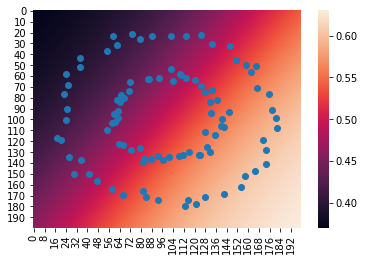

In [38]:
model.fit(X_circle,y_circle,loss='binary_crossentropy', batch_size=10,n_epochs=1)
graph=sns.heatmap(model.predict(grid).reshape((n_steps,n_steps)))
graph.scatter(x= (X_circle[:,0]+1)*100, y=(X_circle[:,1]+1)*100)

In [39]:
model.weights

[array([[ 5.14637985e-01,  7.70481198e-01],
        [-5.80579289e-04,  1.26929021e-01],
        [ 8.51200014e-01,  2.40325508e-01],
        [ 1.80835299e-01,  7.24979260e-01]]),
 array([[0.31547145, 0.57828827, 0.04665008, 0.93384987],
        [0.60072023, 0.92355525, 0.24890008, 0.12952252],
        [0.59587271, 0.3964621 , 0.24186402, 0.32778424]]),
 array([[0.00954346, 0.36404888, 0.34580449]])]

In [40]:
my_nn=handmade_nn(5)
my_nn.add_dense_layer(10,'tanh',weights_initializer='ones')
my_nn.add_dense_layer(1,'sigmoid',weights_initializer='ones')

In [41]:
my_nn.set_loss('binary_crossentropy')

In [18]:
my_nn.predict([1,0.2,0.1,1,0.1])

array([[0.99994655]])

In [19]:
my_nn.score([1,0.2,0.1,1,0.1],np.ones((1,1)),'binary_crossentropy')

5.344939167516914e-05

In [20]:
my_nn.compute_backpropagation(np.array([[1,0.2,0.1,1,0.1]]),np.ones((1,1)))

([array([[-1.73084678e-06, -3.46169356e-07, -1.73084678e-07,
          -1.73084678e-06, -1.73084678e-07],
         [-1.73084678e-06, -3.46169356e-07, -1.73084678e-07,
          -1.73084678e-06, -1.73084678e-07],
         [-1.73084678e-06, -3.46169356e-07, -1.73084678e-07,
          -1.73084678e-06, -1.73084678e-07],
         [-1.73084678e-06, -3.46169356e-07, -1.73084678e-07,
          -1.73084678e-06, -1.73084678e-07],
         [-1.73084678e-06, -3.46169356e-07, -1.73084678e-07,
          -1.73084678e-06, -1.73084678e-07],
         [-1.73084678e-06, -3.46169356e-07, -1.73084678e-07,
          -1.73084678e-06, -1.73084678e-07],
         [-1.73084678e-06, -3.46169356e-07, -1.73084678e-07,
          -1.73084678e-06, -1.73084678e-07],
         [-1.73084678e-06, -3.46169356e-07, -1.73084678e-07,
          -1.73084678e-06, -1.73084678e-07],
         [-1.73084678e-06, -3.46169356e-07, -1.73084678e-07,
          -1.73084678e-06, -1.73084678e-07],
         [-1.73084678e-06, -3.46169356e-07, -1

In [21]:
my_nn.fit(np.array([[1,0.2,0.1,1,0.1]]), np.ones(1),n_epochs=1)
my_nn.weights

initial loss: 5.344939167516914e-05
final loss: 5.3449085775056684e-05


[array([[1.00000002, 1.        , 1.        , 1.00000002, 1.        ],
        [1.00000002, 1.        , 1.        , 1.00000002, 1.        ],
        [1.00000002, 1.        , 1.        , 1.00000002, 1.        ],
        [1.00000002, 1.        , 1.        , 1.00000002, 1.        ],
        [1.00000002, 1.        , 1.        , 1.00000002, 1.        ],
        [1.00000002, 1.        , 1.        , 1.00000002, 1.        ],
        [1.00000002, 1.        , 1.        , 1.00000002, 1.        ],
        [1.00000002, 1.        , 1.        , 1.00000002, 1.        ],
        [1.00000002, 1.        , 1.        , 1.00000002, 1.        ],
        [1.00000002, 1.        , 1.        , 1.00000002, 1.        ]]),
 array([[1.00000053, 1.00000053, 1.00000053, 1.00000053, 1.00000053,
         1.00000053, 1.00000053, 1.00000053, 1.00000053, 1.00000053]])]

In [22]:
my_nn.bias

[array([1.73084678e-08, 1.73084678e-08, 1.73084678e-08, 1.73084678e-08,
        1.73084678e-08, 1.73084678e-08, 1.73084678e-08, 1.73084678e-08,
        1.73084678e-08, 1.73084678e-08]),
 array([5.34479633e-07])]